Groundwater data preview:
                ST_NM  Groundwater_Deficit
0     Andhra Pradesh                37.50
1          Telangana                54.17
2            Gujarat                20.83
3          Karnataka                29.17
4     Madhya Pradesh                12.50
5        Maharashtra                29.17
6             Odisha                33.33
7             Punjab                45.83
8          Rajasthan                 0.00
9         Tamil Nadu                37.50
10       West Bengal                45.83
11     Uttar Pradesh                37.50
12      Chhattisgarh                37.50
13  Himachal Pradesh                41.67
14         Jharkhand                12.50
15       Uttarakhand                41.67
16            Kerala                  NaN
17           Tripura                  NaN


C:\Users\IEG\AppData\Local\Temp\ipykernel_12472\46491682.py:54: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):


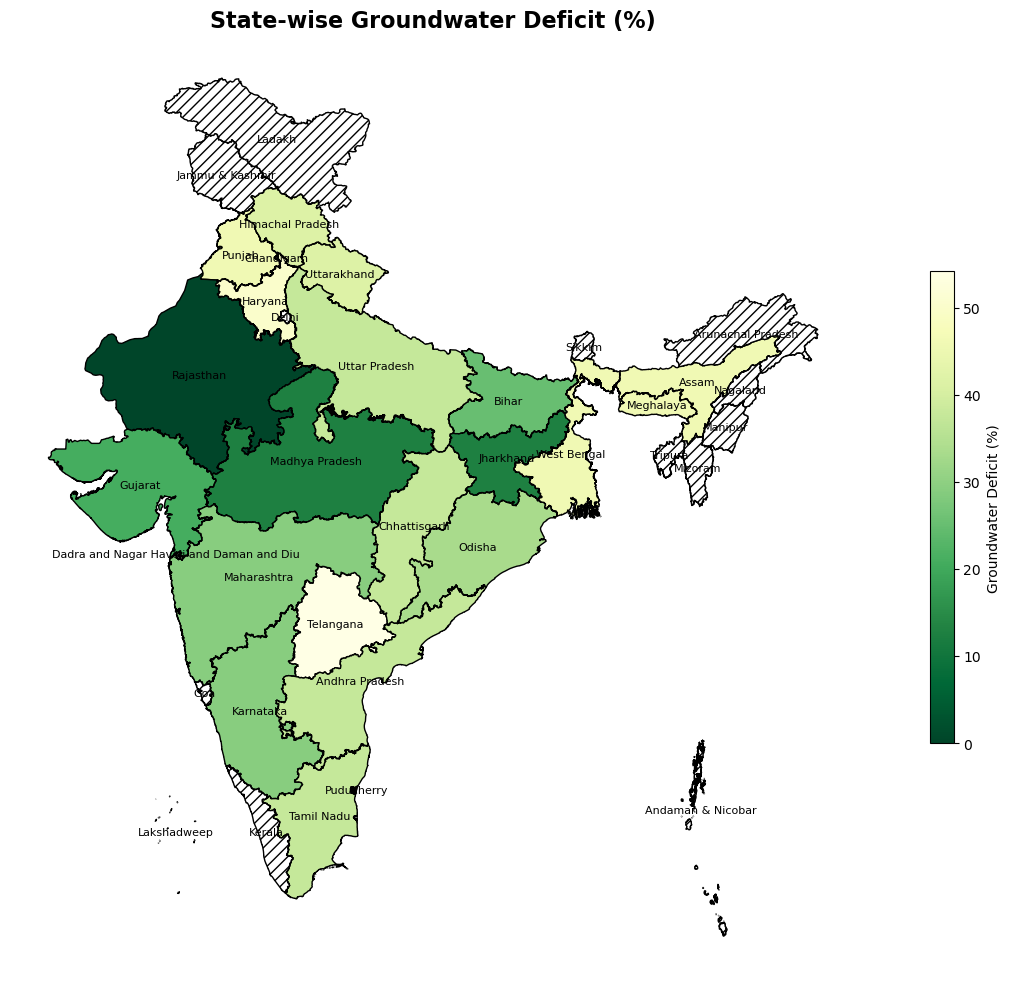

In [1]:
!pip install fiona shapely pyproj rtree
!pip install geopandas matplotlib pandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Path to the shapefile
shapefile_path = r"C:\Users\IEG\Desktop\state_map\Admin2.shp"

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Load the reservoir volume data from the CSV file
csv_path = "Groundwater_Deficit.csv"
groundwater_data = pd.read_csv(csv_path)

# Print the first few rows to inspect the data
print("Groundwater data preview:\n", groundwater_data.head(18))

# Assuming 'State' column in CSV matches 'ST_NM' in shapefile, and 'Volume' holds reservoir volumes
STATE_COLUMN = 'ST_NM'  # State names in the shapefile
CSV_STATE_COLUMN = 'ST_NM'  # State column in CSV (adjust if necessary)
DEFICIT_COLUMN = 'Groundwater_Deficit'    # Volume column in CSV (adjust if necessary)

# Merge the shapefile data with the reservoir data based on state names
gdf_merged = gdf.merge(groundwater_data, how='left', left_on=STATE_COLUMN, right_on=CSV_STATE_COLUMN)

# Plot the map with reservoir volumes, ensuring that missing data shows as blank or NaN
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a choropleth map for reservoir volumes
gdf_merged.plot(
    ax=ax,
    column=DEFICIT_COLUMN,  # Use reservoir volume for color
    cmap='YlGn_r',        # Reversed green color map, lightest for highest values
    legend=True,
    edgecolor='black',
    missing_kwds={         # Define how missing data will be displayed
        "color": "white",   # States with no data will be pure white
        "hatch": "///",     # Dot-dot pattern for unavailable data
        "label": "No Data"  # Label for the missing data in the legend
    },
    legend_kwds={
        'label': "Groundwater Deficit (%)",
        'orientation': "vertical",
        'shrink': 0.5
    }
)

# Add a title to the map
ax.set_title("State-wise Groundwater Deficit (%)", fontsize=16, fontweight='bold')

# Annotate each state with its name inside the map, no bold for state names
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Remove the axis for a cleaner map
ax.set_axis_off()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the map
plt.show()

Groundwater data preview:
                ST_NM  Groundwater_Surplus
0     Andhra Pradesh            33.330000
1          Telangana            25.000000
2            Gujarat            25.000000
3          Karnataka            29.170000
4     Madhya Pradesh            16.670000
5        Maharashtra            29.170000
6             Odisha            41.670000
7             Punjab            45.830000
8          Rajasthan            16.666667
9         Tamil Nadu            25.000000
10       West Bengal            41.670000
11     Uttar Pradesh            41.670000
12      Chhattisgarh            16.670000
13  Himachal Pradesh            33.330000
14         Jharkhand            20.830000
15       Uttarakhand            45.830000
16            Kerala                  NaN
17           Tripura                  NaN


C:\Users\IEG\AppData\Local\Temp\ipykernel_12472\3295240743.py:54: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):


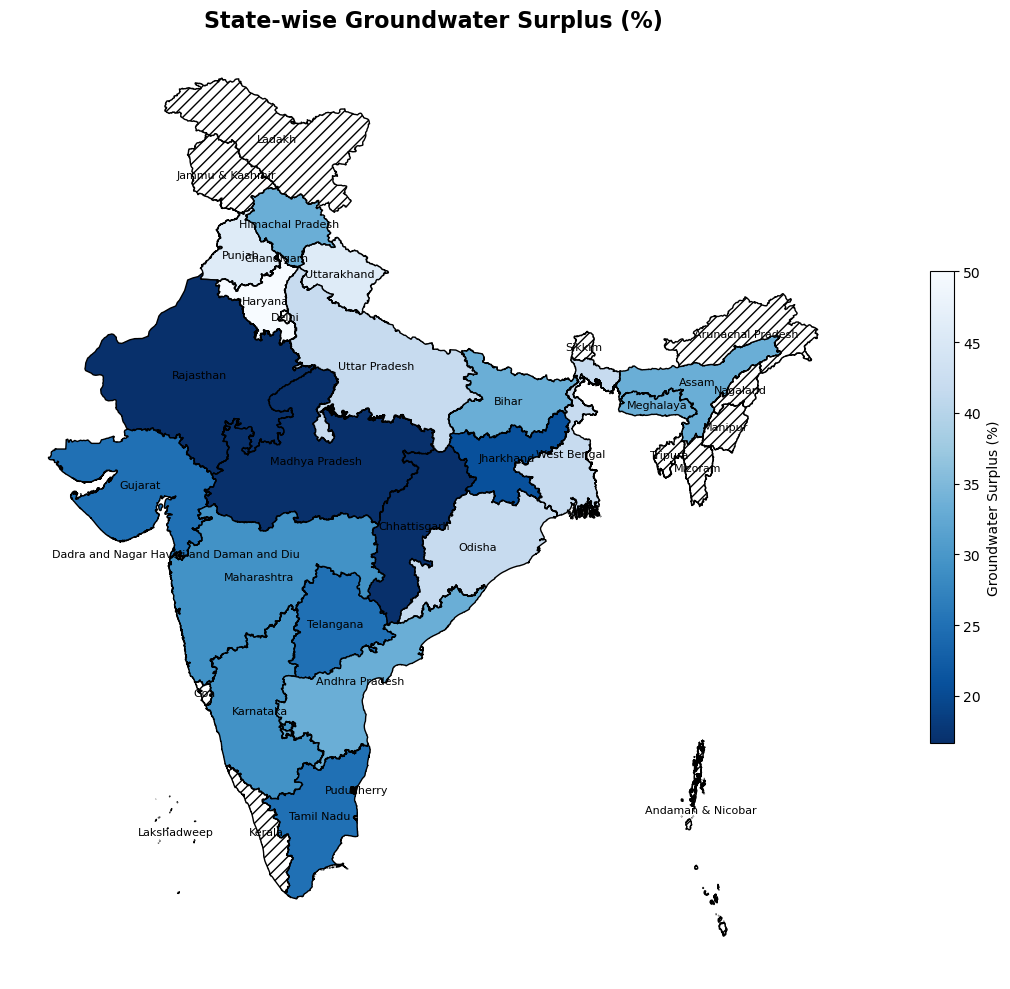

In [3]:
!pip install fiona shapely pyproj rtree
!pip install geopandas matplotlib pandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Path to the shapefile
shapefile_path = r"C:\Users\IEG\Desktop\state_map\Admin2.shp"

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Load the reservoir volume data from the CSV file
csv_path = "Groundwater_Surplus.csv"
groundwater_data = pd.read_csv(csv_path)

# Print the first few rows to inspect the data
print("Groundwater data preview:\n", groundwater_data.head(18))

# Assuming 'State' column in CSV matches 'ST_NM' in shapefile, and 'Volume' holds reservoir volumes
STATE_COLUMN = 'ST_NM'  # State names in the shapefile
CSV_STATE_COLUMN = 'ST_NM'  # State column in CSV (adjust if necessary)
SURPLUS_COLUMN = 'Groundwater_Surplus'    # Volume column in CSV (adjust if necessary)

# Merge the shapefile data with the reservoir data based on state names
gdf_merged = gdf.merge(groundwater_data, how='left', left_on=STATE_COLUMN, right_on=CSV_STATE_COLUMN)

# Plot the map with reservoir volumes, ensuring that missing data shows as blank or NaN
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a choropleth map for reservoir volumes
gdf_merged.plot(
    ax=ax,
    column=SURPLUS_COLUMN,  # Use reservoir volume for color
    cmap='Blues_r',        # Reversed green color map, lightest for highest values
    legend=True,
    edgecolor='black',
    missing_kwds={         # Define how missing data will be displayed
        "color": "white",   # States with no data will be pure white
        "hatch": "///",     # Dot-dot pattern for unavailable data
        "label": "No Data"  # Label for the missing data in the legend
    },
    legend_kwds={
        'label': "Groundwater Surplus (%)",
        'orientation': "vertical",
        'shrink': 0.5
    }
)

# Add a title to the map
ax.set_title("State-wise Groundwater Surplus (%)", fontsize=16, fontweight='bold')

# Annotate each state with its name inside the map, no bold for state names
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Remove the axis for a cleaner map
ax.set_axis_off()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the map
plt.show()